In [1]:
# 単語のクラス
class Word:
    def __init__(self, token):
        # 表層形
        self.text = token.surface

        # 原型
        self.basicForm = token.base_form

        # 品詞
        self.pos = token.part_of_speech
        
    # 単語の情報を「表層系\t原型\t品詞」で返す
    def wordInfo(self):
        return self.text + "\t" + self.basicForm + "\t" + self.pos

In [2]:
from janome.tokenizer import Tokenizer

# 引数のtextをJanomeで解析して単語リストを返す関数
def janomeAnalyzer(text):
    # 形態素解析
    t = Tokenizer()
    tokens = t.tokenize(text) 

    # 解析結果を1行ずつ取得してリストに追加
    wordlist = []
    for token in tokens:
        word = Word(token)
        wordlist.append(word)
    return wordlist

In [14]:
# 解析するファイルを読み込む
infile = ["./cnn20221208.csv","korean20221207.csv","nhk20221207.csv","korean20221208.csv","nhk20221208.csv"]
outfile = ["./out/cnn20221208_parsed.txt","./out/korean20221207_parsed.txt","./out/nhk20221207_parsed.txt","./out/korean20221208_parsed.txt","./out/nhk20221208_parsed.txt"]

def file(infile,outfile):
    wordlist = []
    with open(infile, "r", encoding="utf-8") as fileobj:
        # ファイルを読み込み形態素解析
        text = fileobj.read()

    # 結果をファイルに書き込む
    with open(outfile, "w", encoding="utf-8") as fileobj:    
        wordlist = janomeAnalyzer(text)
        for word in wordlist:
            fileobj.write(word.wordInfo() + "\n")

    print("出力：" + outfile)

for i in range(5):
    file(infile[i],outfile[i])

出力：./out/cnn20221208_parsed.txt
出力：./out/korean20221207_parsed.txt
出力：./out/nhk20221207_parsed.txt
出力：./out/korean20221208_parsed.txt
出力：./out/nhk20221208_parsed.txt


In [3]:
from collections import Counter
import glob

all_nounlist = [] # 全ての文の名詞リスト
all_counter = [] # 全ての文のカウンター
       
# TF-IDF計算に使用する全ファイルを読み込む
# （今回はtweetdata2フォルダにある全ファイル）
files = glob.glob('./20221207/*')

# ファイル数
countfiles = len(files)

# 全てのファイルを形態素解析して名詞の頻度カウンターを作成
for infile in files:
    with open(infile, "r", encoding="utf_8") as fileobj:
        print(infile)
        # ファイルからテキストを取得
        text = fileobj.read()
        # text = text.replace("\n", "")

        # 形態素解析
        wordlist = janomeAnalyzer(text)
        
        # 解析結果から名詞を取り出し，名詞のリストを作成
        nounList = []
        for word in wordlist:
            pos = word.pos.split(',')
            if(pos[0]=="名詞"):
                nounList.append(word.basicForm)
        all_nounlist.append(nounList) 
        
        # 名詞のリストからカウンターを作成
        counter = Counter(nounList)
        
        # 頻度の上位20語を出力
        for word, count in counter.most_common(30):
            print("(%s, %d) " % (word, count), end="")
        print()
        all_counter.append(counter)
# print(all_counter)


./20221207\chinese20221207.csv
(中国, 9) (年, 6) (7, 4) (国家, 4) (主席, 4) (協力, 3) (海南, 3) (世界, 3) (％, 3) (江沢民, 3) (自由, 2) (貿易, 2) (港, 2) (経済, 2) (国際, 2) (潮, 2) (開催, 2) (化, 2) (商業, 2) (国防, 2) (部, 2) (的, 2) (以上, 2) (省, 2) (族, 2) (日, 2) (月, 2) (業, 2) (48, 2) (., 2) 
./20221207\cnn20221207.csv
(米, 12) (ウクライナ, 5) (投票, 4) (州, 4) (流行, 3) (人, 3) (２, 3) (決選, 3) (氏, 3) (低下, 2) (研究, 2) (逮捕, 2) (裁判所, 2) (食品, 2) (危険, 2) (トランプ, 2) (攻撃, 2) (ロシア, 2) (ジョージア, 2) (上院, 2) (選, 2) (接種, 2) (率, 2) (破り, 2) (８, 2) (強, 2) (中国, 1) (政府, 1) (ゼロ, 1) (コロナ, 1) 
./20221207\korean20221207.csv
(韓国, 28) (１, 9) (日, 8) (４, 7) (２, 6) (年, 6) (サッカー, 6) (代表, 6) (カタール, 6) (W, 6) (杯, 6) (., 6) (大統領, 5) (北朝鮮, 5) (戦, 5) (軍, 5) (７, 5) (尹, 4) (３, 4) (Ｗ杯, 4) (ウォン, 4) (2, 4) (政府, 4) (０, 4) (攻撃, 4) (物流, 3) (スト, 3) (韓, 3) (会, 3) (帰国, 3) 
./20221207\nhk20221207.csv
(人, 16) (円, 10) (1, 9) (者, 8) (2, 8) (米, 8) (日, 7) (万, 7) (ワールドカップ, 6) (日本, 6) (代表, 6) (逮捕, 6) (東京, 6) (被害, 6) (感染, 6) (年, 6) (コロナ, 6) (死亡, 6) (方針, 5) (省, 5) (統一教会, 5) (救済, 5) (検討, 

In [4]:
# tを含む文書の数を保持する辞書（t:単語，値：文書数）
dfs = {}

# dfsを求める
for counter in all_counter:
    for t in counter.keys():

        # 単語tがdfsに含まれていなかったら追加
        # 含まれていたら1足す
        if t not in dfs:
            dfs[t] =1
        else:
            dfs[t] += 1

In [5]:
# DF(t)を求める
df = {}
for t, val in dfs.items():
    df[t] = val/countfiles
# print(df)

In [6]:
# IDF(t)を求める
idf = {}
import math
for t, val in df.items():
    #idf[t] = math.log(1/df[t])
    idf[t] = math.log(countfiles/(1+dfs[t]))
# print(idf)

In [14]:
#対象ツイートのファイル名
filename = "20221207\\chinese20221207.csv"

#対象ファイル名を出力
print("解析ファイル：" + filename)

filenum = 0
for infile in files:
    if filename in infile:
        break
    else:
        print(infile)
        filenum += 1
print(filenum)

# 延べ語数を求める
counter = all_counter[filenum]
nobe = sum(counter.values())

# TFを求める
tf={}
for t in counter.keys():
    # 全ての単語に対して頻度/延べ語数をtfに追加
    tf[t] = counter[t]/nobe

# TF-IDFを求める
tf_idf = {}
for t, val in tf.items():
    tf_idf[t] = val * idf[t]

解析ファイル：20221207\chinese20221207.csv
0


In [15]:
# 出力
tf_idf_sorted = sorted(tf_idf.items(), key=lambda x:x[1], reverse=True)

# TF_IDF上位20語を「単語,TFIDF値，頻度」の形式で出力
print("単語, TF-IDF値, 頻度")
for t, val in tf_idf_sorted[:20]:
    print("%s, %.5f, %d" % (t, val, counter[t]))

単語, TF-IDF値, 頻度
主席, 0.00994, 4
海南, 0.00745, 3
江沢民, 0.00745, 3
貿易, 0.00497, 2
港, 0.00497, 2
潮, 0.00497, 2
商業, 0.00497, 2
部, 0.00497, 2
族, 0.00497, 2
業, 0.00497, 2
48, 0.00497, 2
海, 0.00497, 2
習近平, 0.00497, 2
追悼, 0.00497, 2
国, 0.00497, 2
国家, 0.00412, 4
協力, 0.00309, 3
2023, 0.00248, 1
メタバース, 0.00248, 1
トレンド, 0.00248, 1


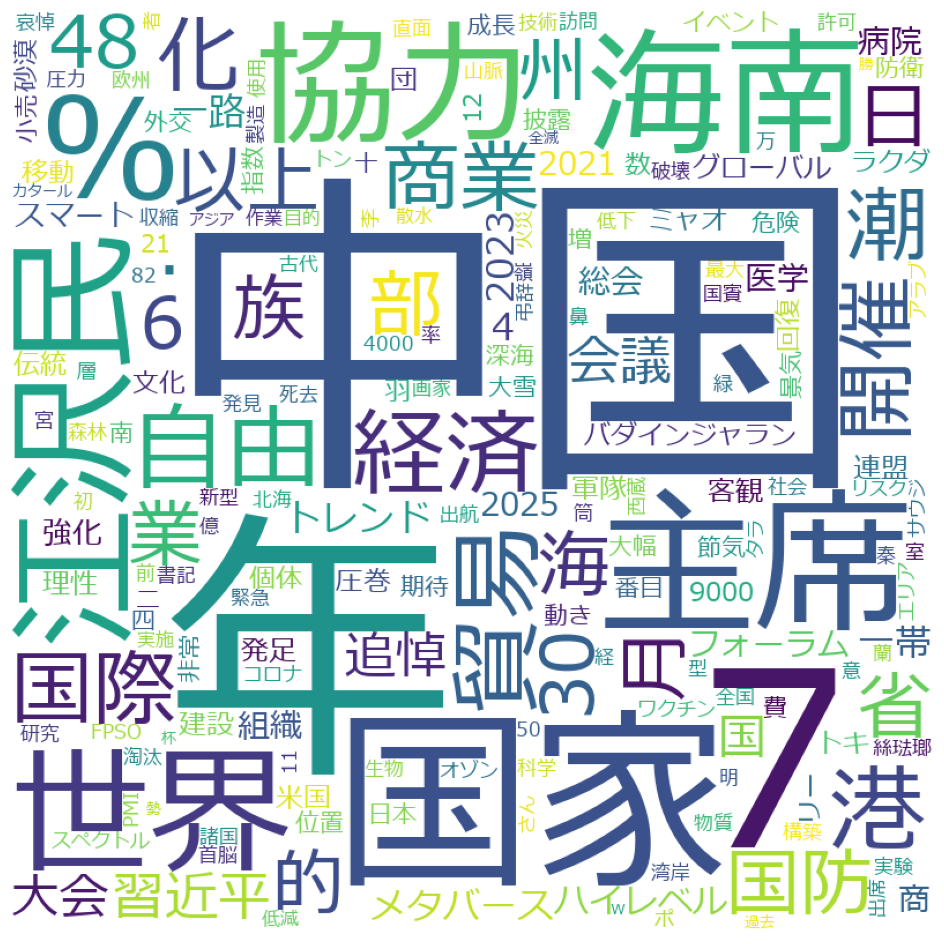

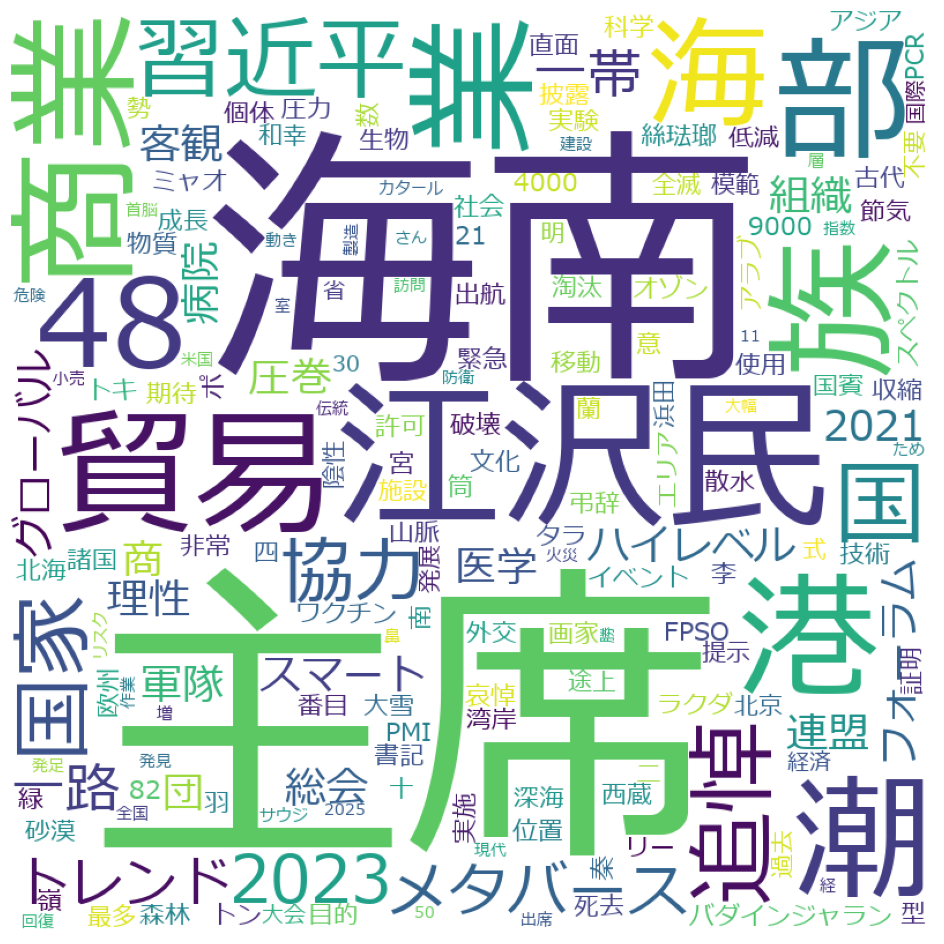

In [16]:
from matplotlib import pyplot as plt
from wordcloud import WordCloud

# WordCloudの設定
wordcloud = WordCloud(background_color="white", 
                      font_path=r"C:\Windows\Fonts\meiryo.ttc", 
                      width=800,height=800)

# Macユーザの場合
#wordcloud = WordCloud(background_color="white", 
#                      font_path=r"/System/Library/Fonts/ヒラギノ明朝 ProN.ttc", 
#                      width=800,height=800)

# 頻度によるWordCloudを出力
wordcloud.fit_words(counter)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

# TF-IDFによるWordCloudを出力
wordcloud.fit_words(tf_idf)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()